## Seaborn

Matplotlib is great, but it takes a while to format the figures to make them presentable. Seaborn is a python library that builds upon matplotlib to make the figures more effective, but a lot of the grunt work is already factored into the library. Seaborn has many valuable functions. We will discuss distplot, swarmplot, and boxplot. We will use seaborn to explore pediatric gene expression data.

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [11]:
# We will be using the Treehouse clinical data as well:

clinical = pd.read_csv('../data/TreehousePEDv5_clinical_metadata.2018-05-09.tsv',
                       sep='\t',
                       index_col=0)

clinical.head()

,disease,age_in_years,gender
th_sampleid,,,
TH03_0010_S01,acute leukemia of ambiguous lineage,11.0,female
TH03_0010_S02,acute leukemia of ambiguous lineage,11.0,female
TH03_0103_S01,rhabdomyosarcoma,NaN,not reported
TH03_0104_S01,hepatoblastoma,NaN,not reported
TH03_0105_S01,rhabdomyosarcoma,NaN,not reported


In [12]:
# We will be focusing on a form of pediatric cancer known as neuroblastoma
samples = clinical[clinical['disease'] == 'neuroblastoma'].index.values

## Distplot

The distplot function plots the distribution of a data set. Be aware that the distplot will by default create a guassian kernel density estimate for your data. If this is not desired, then set KDE to false. 

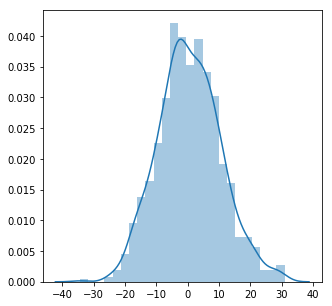

In [6]:
import numpy as np

fig, ax = plt.subplots(1, figsize=(5, 5))

data = np.random.normal(0, 10, 1000)
sns.distplot(data)

### Exercise 1:

1. Load in the Treehouse expression data using the pandas read_csv function.
2. Subset the expression data using the samples we isolated from the clinical data
3. Plot the expression distribution of the MYCN gene using the loc function.
   ( e.g. df["MYCN"] )
4. Determine if this distribution looks like a normal distribution.

In [13]:
exp = pd.read_csv('../data/nbl-expression.tsv',
                  sep='\t', 
                  header=None,
                  index_col=0)

exp.index.name = 'Sample'
exp.columns = ['MYCN']
exp.head()

,MYCN
Sample,
TH03_0015_S01,3.908813
TH03_0015_S02,1.748461
TH06_0284_S01,1.974529
TH03_0287_S01,5.938992
TH03_0288_S01,4.674686


###  Exercise 2:
For this exercise we will focus on the TARGET samples because the TARGET samples have additional molecular data associated with them.

1. Load in the TARGET samples that are known to be MYCN amplified 
    pth = "../data/MYCN-Amplified"
2. Subset the expression matrix again to only include the TARGET samples. 
3. Create a plot where the MYCN amplified and MYCN non-amplified samples have different colors.

## Swarmplot 

The next plot is called a swarmplot. This is another helpful plot for displaying categorical data. One of the benefits of a swarmplot is that it shows jittered data points, which gives an idea of the distribution of the data set.

One of the challenges with the seaborn package is that it is somewhat picky in how you give it the data. I've found that the easiest way to use these functions is to create a dataframe in long form. A long-form dataframe has an independent datum on each line. The goal for this next section of the notebook is to create a dataframe where the columns are sample_id, MYCN_status, MYCN_expression. The function call for swarmplot is like so:

`sns.swarmplot(x='MYCN_status', y='MYCN_expression', data=df)`

### Exercise 3:
1. Create a long-form dataframe with the sample_id, MYCN_status, and MYCN_expression values
2. Plot the data using the swarmplot function `sns.swarmplot`

## Boxplot & Violinplot

One nice thing about seaborn is that once you have this dataframe in long-form, you can just plug it into other seaborn functions to see how it looks.

Exercise 4:
1. Plot the MYCN data using the boxplot function `sns.boxplot`
2. Plot the MYCN data using the boxplot function `sns.violinplot`

## Multiple plots in one figure

I encouraged you to use the plt.subplots function because it makes it straightforward to make more complex figures. We will make a figure here that includes all of the plots you made. To make a 2 by 2 figure, use:

`fig, axes = plt.subplots(2, 2, figsize=(10, 10))`

Now the axes object contains a matrix of plots. To access each element, use common matrix indexing. For example, the top left panel can be accessed using `axes[0, 0]`.

You can pass the Axes object to seaborn functions using the ax keyword. 

`sns.swarmplot(x="MYCN_status", y="MYCN_expression", data=df, ax=axes[0,0]`)

## Exercise 5:
1. Make a four panel figure where the neuroblastoma MYCN expression distribution is plotted in the top left panel, the swarm plot is in the top right panel, the boxplot is in the bottom left panel, and the `sns.violinplot` is in the bottom right panel.

## Barplot

Seaborn also has a nice barplot implementation. Make the same barplot you used in the matplotlib notebook, but use the `sns.barplot` function.

In [10]:
#help(sns.barplot)

If you get a strange error, try converting the MYCN expression to a numeric type using the pd.to_numeric function.

`df["MYCN"] = pd.to_numeric(df["MYCN"])`